In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce
from sklearn import preprocessing

In [2]:
#read the csv file
df = pd.read_csv(r'C:\Users\ANIBRATA\Downloads\titanic\titanic_train.csv')
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [5]:
df.drop(['Cabin'], axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
df.dropna(subset = ["Embarked"], inplace=True)

In [7]:
df=df.fillna(29.0)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


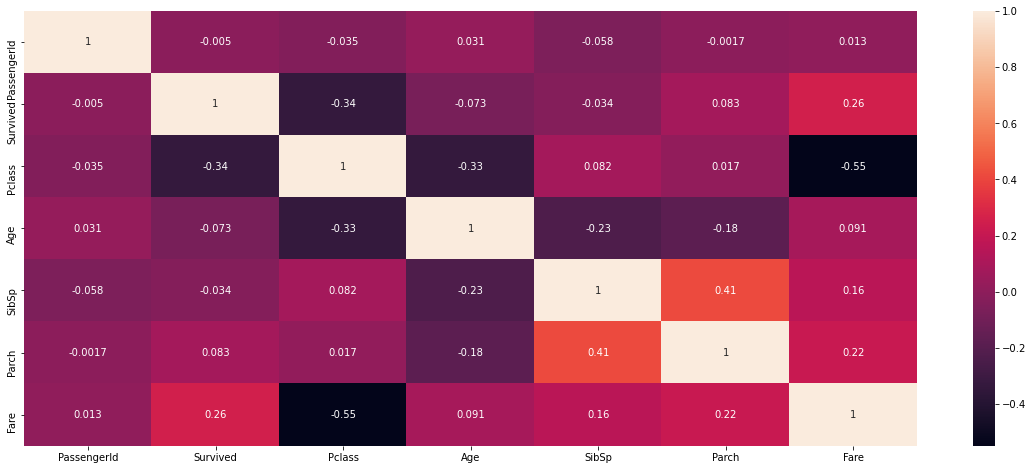

In [9]:
#to check the correlation between columns
#visualisation
corr=df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)

In [10]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e price
X = df.drop(columns=["Survived"],axis=1)   

# y --> contains only the target value 
y =df['Survived']

In [11]:
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.2,random_state=1 , shuffle = False)

In [12]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=1 , shuffle = False)

In [13]:
X_train.shape , X_val.shape , X_test.shape

((711, 10), (89, 10), (89, 10))

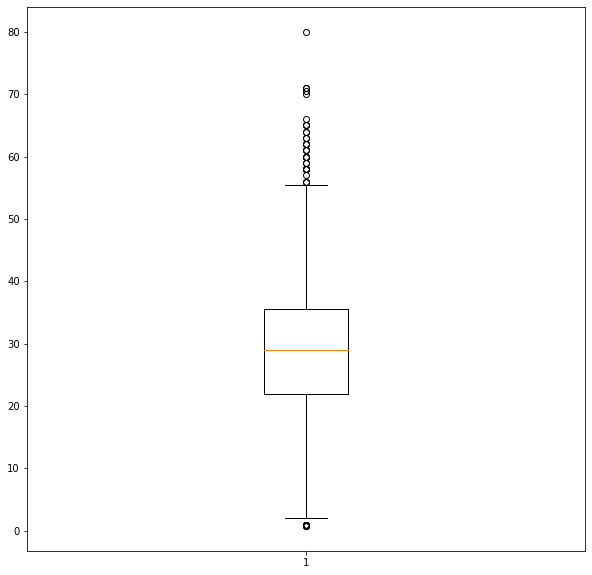

In [14]:
#outlier detection in delay column using boxplot analysis
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 10))
plt.boxplot(X_train.Age)
plt.show()

In [15]:
ticketenc = preprocessing.LabelEncoder() 

In [16]:
X_train['Ticketenc']= ticketenc.fit_transform(X_train['Ticket'])

In [17]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticketenc
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,425
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,493
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,555
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,40
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,384


In [18]:
X_val['Ticketenc']= ticketenc.fit_transform(X_val['Ticket'])
X_test['Ticketenc']= ticketenc.fit_transform(X_test['Ticket'])

In [19]:
def drop_all(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [20]:
X_train ,X_val, X_test = drop_all(['Ticket'])

In [21]:
embarkedenc = preprocessing.LabelEncoder() 
X_train['embarkedenc']= ticketenc.fit_transform(X_train['Embarked'])
X_test['embarkedenc']= ticketenc.fit_transform(X_test['Embarked'])
X_val['embarkedenc']= ticketenc.fit_transform(X_val['Embarked'])
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Ticketenc,embarkedenc
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,425,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,493,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,555,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,40,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,384,2


In [22]:
X_train ,X_val, X_test = drop_all(['Embarked'])

In [23]:
X_train ,X_val, X_test = drop_all(['Name'])

In [24]:
sexenc = preprocessing.LabelEncoder() 
X_train['sexenc']= ticketenc.fit_transform(X_train['Sex'])
X_test['sexenc']= ticketenc.fit_transform(X_test['Sex'])
X_val['sexenc']= ticketenc.fit_transform(X_val['Sex'])
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Ticketenc,embarkedenc,sexenc
0,1,3,male,22.0,1,0,7.2500,425,2,1
1,2,1,female,38.0,1,0,71.2833,493,0,0
2,3,3,female,26.0,0,0,7.9250,555,2,0
3,4,1,female,35.0,1,0,53.1000,40,2,0
4,5,3,male,35.0,0,0,8.0500,384,2,1


In [25]:
X_train ,X_val, X_test = drop_all(['PassengerId'])
X_train ,X_val, X_test = drop_all(['Sex'])
X_train ,X_val, X_test = drop_all(['SibSp'])
X_train ,X_val, X_test = drop_all(['Parch'])

In [26]:
X_train.head()

,Pclass,Age,Fare,Ticketenc,embarkedenc,sexenc
0,3,22.0,7.2500,425,2,1
1,1,38.0,71.2833,493,0,0
2,3,26.0,7.9250,555,2,0
3,1,35.0,53.1000,40,2,0
4,3,35.0,8.0500,384,2,1


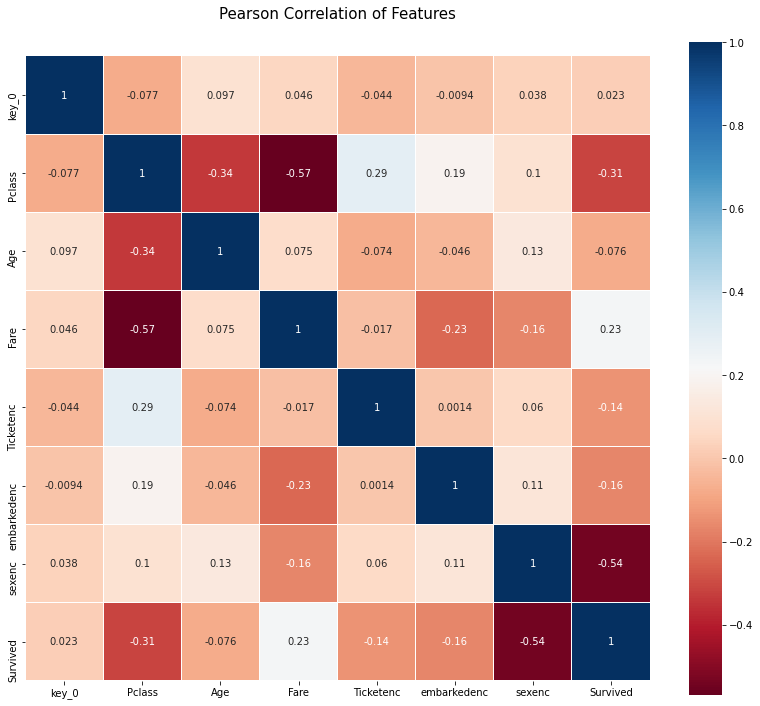

In [27]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0 , max_depth=3)

In [29]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [30]:
final_result = classifier.predict(X_train)
final_result = pd.Series(final_result,name='Survived')
X_train.reset_index(drop=True,inplace=True)
Final = X_train.merge(final_result , on = X_train.index )
Final 

,key_0,Pclass,Age,Fare,Ticketenc,embarkedenc,sexenc,Survived
0,0,3,22.0,7.2500,425,2,1,0
1,1,1,38.0,71.2833,493,0,0,1
2,2,3,26.0,7.9250,555,2,0,1
3,3,1,35.0,53.1000,40,2,0,1
4,4,3,35.0,8.0500,384,2,1,0
...,...,...,...,...,...,...,...,...
706,706,1,42.0,26.2875,479,2,1,0
707,707,1,22.0,151.5500,28,2,0,1
708,708,3,29.0,15.2458,159,0,1,0
709,709,1,24.0,49.5042,481,0,0,1


In [31]:
from sklearn.metrics import accuracy_score
y_true=y_train
y_pred=Final['Survived']
accuracy_score(y_true, y_pred)

0.810126582278481

In [32]:
final_result = classifier.predict(X_test)
final_result = pd.Series(final_result,name='Survived')
X_test.reset_index(drop=True,inplace=True)
Final = X_test.merge(final_result , on = X_test.index )
Final 

,key_0,Pclass,Age,Fare,Ticketenc,embarkedenc,sexenc,Survived
0,0,2,31.00,26.2500,70,2,0,1
1,1,1,11.00,120.0000,5,2,1,1
2,2,3,0.42,8.5167,24,0,1,1
3,3,3,27.00,6.9750,46,2,1,0
4,4,3,31.00,7.7750,42,2,1,0
...,...,...,...,...,...,...,...,...
84,84,2,27.00,13.0000,16,2,1,0
85,85,1,19.00,30.0000,2,2,0,1
86,86,3,29.00,23.4500,84,2,0,1
87,87,1,26.00,30.0000,0,0,1,0


In [33]:
from sklearn.metrics import accuracy_score
y_true=y_test
y_pred=Final['Survived']
accuracy_score(y_true, y_pred)

0.7865168539325843

In [34]:
final_result = classifier.predict(X_val)
final_result = pd.Series(final_result,name='Survived')
X_val.reset_index(drop=True,inplace=True)
Final = X_val.merge(final_result , on = X_val.index )
Final 

,key_0,Pclass,Age,Fare,Ticketenc,embarkedenc,sexenc,Survived
0,0,1,48.0,52.0000,13,2,1,0
1,1,3,29.0,9.4833,69,2,1,0
2,2,2,52.0,13.0000,22,2,1,0
3,3,3,19.0,7.6500,46,2,1,0
4,4,1,38.0,227.5250,78,0,0,1
...,...,...,...,...,...,...,...,...
84,84,1,49.0,25.9292,10,2,0,1
85,85,3,31.0,8.6833,51,2,0,1
86,86,3,30.0,7.2292,27,0,1,0
87,87,3,30.0,24.1500,40,2,0,1


In [35]:
from sklearn.metrics import accuracy_score
y_true=y_val
y_pred=Final['Survived']
accuracy_score(y_true, y_pred)

0.797752808988764

# EXPERIMENT ON MAIN_TEST

In [36]:
df = pd.read_csv(r'C:\Users\ANIBRATA\Downloads\titanic\titanic_test.csv')
df.shape

(418, 11)

In [37]:
df.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [38]:
df.drop(['Cabin'], axis=1,inplace=True)

In [39]:
df=df.fillna(30.0)

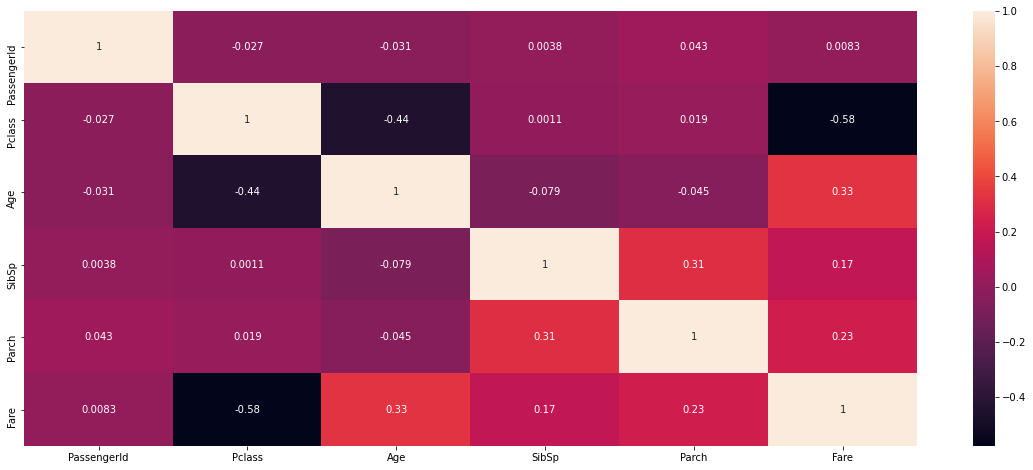

In [40]:
#to check the correlation between columns
#visualisation
corr=df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)

In [41]:
df1=df['PassengerId']

In [42]:
df['Ticketenc']= ticketenc.fit_transform(df['Ticket'])

In [43]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticketenc
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,152
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,221
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,73
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,147
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,138


In [44]:
df=df.drop(columns=['Ticket'])

In [45]:
df['embarkedenc']= embarkedenc.fit_transform(df['Embarked'])
df=df.drop(columns=['Embarked'])

In [46]:
df['Sexenc']= sexenc.fit_transform(df['Sex'])
df=df.drop(columns=['Sex'])

In [47]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Ticketenc,embarkedenc,Sexenc
0,892,3,"Kelly, Mr. James",34.5,0,0,7.8292,152,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,221,2,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,73,1,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,147,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,138,2,0


In [48]:
df=df.drop(columns=['Name'])

In [49]:
df=df.drop(columns=['PassengerId'])
df=df.drop(columns=['SibSp'])
df=df.drop(columns=['Parch'])

In [50]:
df.head()

,Pclass,Age,Fare,Ticketenc,embarkedenc,Sexenc
0,3,34.5,7.8292,152,1,1
1,3,47.0,7.0000,221,2,0
2,2,62.0,9.6875,73,1,1
3,3,27.0,8.6625,147,2,1
4,3,22.0,12.2875,138,2,0


In [51]:
final_result = classifier.predict(df)
final_result = pd.Series(final_result,name='Survived')
df1.reset_index(drop=True,inplace=True)
Final = df1.to_frame().merge(final_result , on = df1.index )
Final 

,key_0,PassengerId,Survived
0,0,892,0
1,1,893,1
2,2,894,0
3,3,895,0
4,4,896,1
...,...,...,...
413,413,1305,0
414,414,1306,1
415,415,1307,0
416,416,1308,0


In [52]:
Final=Final.drop(columns='key_0')

In [53]:
Final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
